# Project ML Worklow
## Contributing students : 
- AJI Yassine
- DAKHIA Rayan
- ZAFZAFI Zakariae

## Importing the workflow

In [33]:

from ml_workflow import *


## Loading the dataset

In [34]:
bank = pd.read_csv('../data/data_banknote_authentication.csv')
kidney = pd.read_csv('../data/kidney_disease.csv', na_values='?')
kidney.drop('id', inplace=True, axis=1)


## Exploratory Data Analysis

Here we display some of the datasets' columns to get a preview of what we're working with

In [35]:
bank.head()


,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [36]:
kidney.head()


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


We look into the datasets' information to verify if there are any missing values

In [37]:
bank.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [38]:
kidney.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

We display the statistical information of our datasets

In [39]:
bank.describe()


,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [40]:
kidney.select_dtypes(include=['int64', 'float64']).describe()


,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [41]:
kidney.select_dtypes(include=[object]).describe()


,rbc,pc,pcc,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,248,335,396,396,330,295,270,398,398,398,399,399,399,400
unique,2,2,2,2,44,92,49,2,5,3,2,2,2,3
top,normal,normal,notpresent,notpresent,41,9800,5.2,no,no,no,good,no,no,ckd
freq,201,259,354,374,21,11,18,251,258,362,317,323,339,248


## Data preprocessing

Here, we prepare our datasets for training

In [42]:
np.array(kidney.drop('classification', axis=1, inplace=False).shape)


array([400,  24])

In [43]:
bank, label_bank = data_preprocessing(bank, 'class')
kidney, label_kidney = data_preprocessing(kidney, 'classification')
np.array(kidney).shape


(400, 223)

## Preparing the dataset

In [44]:
X_train_bank, X_val_bank, X_test_bank, y_train_bank, y_val_bank, y_test_bank = prepare_dataset(bank, label_bank)
X_train_kidney, X_val_kidney, X_test_kidney, y_train_kidney, y_val_kidney, y_test_kidney = prepare_dataset(kidney, label_kidney)


In [45]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', SGDClassifier()))
models.append(('XGB', GradientBoostingClassifier()))

seed = 10


In [47]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train_bank, y_train_bank, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.981184 (0.012114)
LDA: 0.990061 (0.010372)
XGB: 0.991160 (0.008269)


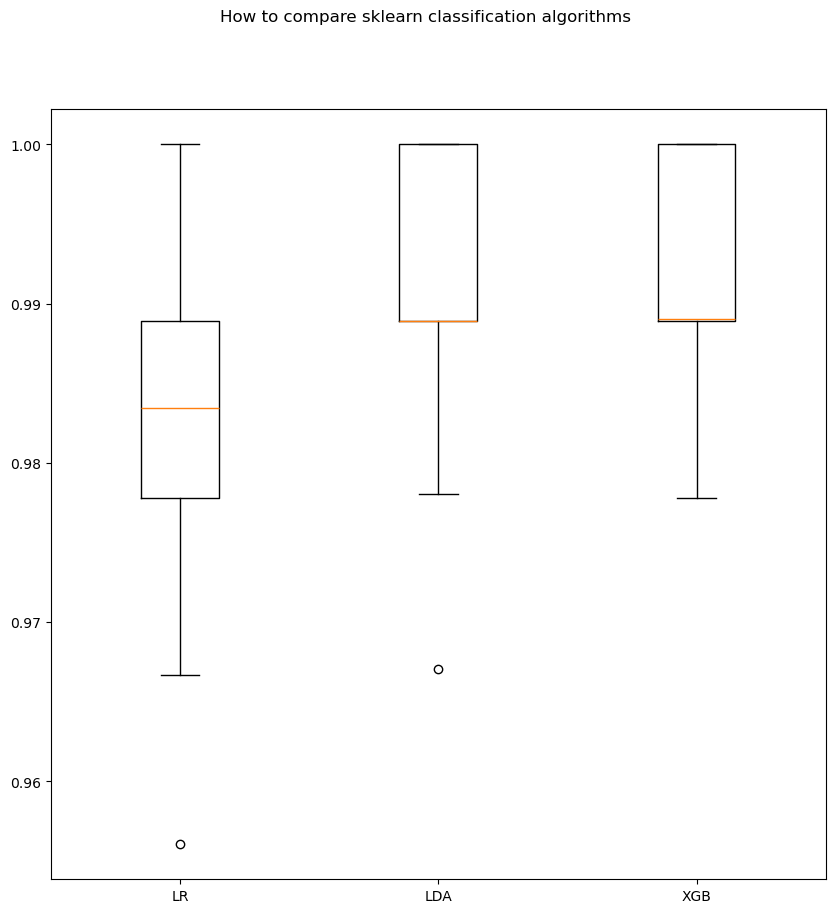

In [48]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('How to compare sklearn classification algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


## Training the models

In [ ]:
clf, clff = training_validating_model(X_train, X_val, X_test, y_train, y_val, y_test, GradientBoostingClassifier())


NameError: name 'X_train' is not defined

## Displaying the results and comparing the models

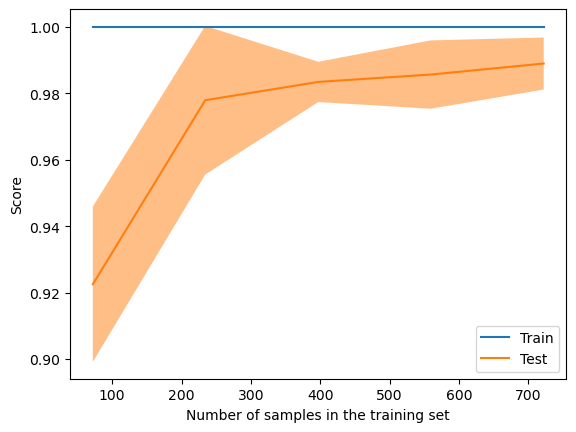

In [ ]:
display_results(X_train, X_val, X_test, y_train, y_val, y_test, clf, clff, 'lc')
